# Project - MAT 328 Techniques In Data Science

## New York State Tuition Assistance Program (TAP) Grants Data Analysis

### 1. Loading and cleaning the data

In [169]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [170]:
nys_tap_data = pd.read_csv("TAP_Recipients_Dollars_by_College__Sector_Group_and_Level_of_Study.csv")

In [171]:
nys_tap_data.head()

,Academic Year,TAP College Code,Federal School Code,Level,TAP Level of Study,TAP College Name,Sector Type,TAP Sector Group,TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
0,2000,5151,9895,G,Grad,YESHIVA UNIV GRAD/PROFESSIONAL,PRIVATE,5-INDEPENDENT,135,121.00,46715.50
1,2000,955,2853,U,5 yr Undergrad,SUNY MARITIME COLLEGE,PUBLIC,3-SUNY SO,5,4.00,12420.00
2,2000,5142,2894,G,Grad,UNIV OF ROCHESTER SIMON SCH BUS,PRIVATE,5-INDEPENDENT,11,6.67,3495.28
3,2000,5141,4828,G,Grad,UNIV OF ROCHESTER EASTMAN GRAD,PRIVATE,5-INDEPENDENT,9,6.75,1229.75
4,2000,535,20662,U,2 yr Undergrad,THE NEW SCHOOL 4YR UNDERGRAD,PRIVATE,5-INDEPENDENT,15,13.75,39434.75


In [172]:
# Number of rows in the dataset
len(nys_tap_data)

10664

In [173]:
# Filter the dataframe to include only CUNY Colleges from 2010 to 2019 Academic Year 

cuny_tap_data = nys_tap_data[(nys_tap_data["Academic Year"] >= 2010) 
                            & ((nys_tap_data["TAP Sector Group"] == "1-CUNY SR")
                            | (nys_tap_data["TAP Sector Group"] == "2-CUNY CC"))]
cuny_tap_data.head()

,Academic Year,TAP College Code,Federal School Code,Level,TAP Level of Study,TAP College Name,Sector Type,TAP Sector Group,TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
6239,2010,1405,2696,U,5 yr Undergrad,CUNY NYC COLLEGE OF TECHNOLOGY,PUBLIC,1-CUNY SR,39,26.42,107197.83
6240,2010,1404,2691,U,2 yr Undergrad,CUNY MANHATTAN CC,PUBLIC,2-CUNY CC,9336,6341.38,15492174.65
6241,2010,1412,7022,U,4 yr Undergrad,CUNY HERBERT H LEHMAN COLLEGE,PUBLIC,1-CUNY SR,4269,3277.46,11229297.87
6242,2010,1415,10097,U,4 yr Undergrad,CUNY MEDGER EVERS COLLEGE,PUBLIC,1-CUNY SR,1675,1223.67,4302152.72
6243,2010,1414,2693,U,2 yr Undergrad,CUNY JOHN JAY COLLEGE,PUBLIC,1-CUNY SR,565,375.42,1335536.61


In [174]:
# Drop the Sector Type column because we know CUNY Colleges are public colleges
# Drop the Level, TAP College Code and Federal School code columns because it's not useful in this analysis
cuny_tap_data = cuny_tap_data.drop(columns = ["TAP College Code", "Federal School Code", "Level", "Sector Type"])

In [175]:
cuny_tap_data.head()

,Academic Year,TAP Level of Study,TAP College Name,TAP Sector Group,TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
6239,2010,5 yr Undergrad,CUNY NYC COLLEGE OF TECHNOLOGY,1-CUNY SR,39,26.42,107197.83
6240,2010,2 yr Undergrad,CUNY MANHATTAN CC,2-CUNY CC,9336,6341.38,15492174.65
6241,2010,4 yr Undergrad,CUNY HERBERT H LEHMAN COLLEGE,1-CUNY SR,4269,3277.46,11229297.87
6242,2010,4 yr Undergrad,CUNY MEDGER EVERS COLLEGE,1-CUNY SR,1675,1223.67,4302152.72
6243,2010,2 yr Undergrad,CUNY JOHN JAY COLLEGE,1-CUNY SR,565,375.42,1335536.61


In [176]:
# Drop all the rows in the dataset with the College Names ('CUNY GRAD SCH UNDERGRAD PROG' 
# and 'CUNY GRAD CTR-SCHOL OF LABOR UG') because we want to analyze TAP grants awarded to
# to CUNY Senior Colleges and Community Colleges

cuny_tap_data = cuny_tap_data[(cuny_tap_data["TAP College Name"] != "CUNY GRAD SCH UNDERGRAD PROG") 
                             & (cuny_tap_data["TAP College Name"] != "CUNY GRAD CTR-SCHOL OF LABOR UG")]

In [177]:
# Remove rows with CUNY Community Colleges having 5 year programs. I believe this is
# an error in the dataset because CUNY Community Colleges do not have 5 year programs
cuny_tap_data = cuny_tap_data[(cuny_tap_data["TAP Sector Group"] == "1-CUNY SR") 
                                 | ((cuny_tap_data["TAP Sector Group"] == "2-CUNY CC") 
                                 & ((cuny_tap_data["TAP Level of Study"] != "4 yr Undergrad")
                                 & (cuny_tap_data["TAP Level of Study"] != "5 yr Undergrad")))]

In [178]:
len(cuny_tap_data)

326

In [179]:
# Make the TAP College Name the very first column in the dataframe

college_name_column = cuny_tap_data["TAP College Name"]
cuny_tap_data.drop(columns = ["TAP College Name"], inplace = True)
cuny_tap_data.insert(0, "TAP College Name", college_name_column)

In [180]:
cuny_tap_data.head()

,TAP College Name,Academic Year,TAP Level of Study,TAP Sector Group,TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
6239,CUNY NYC COLLEGE OF TECHNOLOGY,2010,5 yr Undergrad,1-CUNY SR,39,26.42,107197.83
6240,CUNY MANHATTAN CC,2010,2 yr Undergrad,2-CUNY CC,9336,6341.38,15492174.65
6241,CUNY HERBERT H LEHMAN COLLEGE,2010,4 yr Undergrad,1-CUNY SR,4269,3277.46,11229297.87
6242,CUNY MEDGER EVERS COLLEGE,2010,4 yr Undergrad,1-CUNY SR,1675,1223.67,4302152.72
6243,CUNY JOHN JAY COLLEGE,2010,2 yr Undergrad,1-CUNY SR,565,375.42,1335536.61


In [181]:
# Sort the data by the College Name and Academic Year, and reindex the rows

cuny_tap_data = cuny_tap_data.sort_values(["TAP College Name", "Academic Year"])
cuny_tap_data.reset_index(drop = True, inplace = True)
cuny_tap_data.head()

,TAP College Name,Academic Year,TAP Level of Study,TAP Sector Group,TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
0,CUNY BARUCH COLLEGE,2010,5 yr Undergrad,1-CUNY SR,105,72.75,304788.75
1,CUNY BARUCH COLLEGE,2010,4 yr Undergrad,1-CUNY SR,5714,4716.21,15899669.13
2,CUNY BARUCH COLLEGE,2011,5 yr Undergrad,1-CUNY SR,109,79.75,366793.75
3,CUNY BARUCH COLLEGE,2011,4 yr Undergrad,1-CUNY SR,5970,5049.04,18694666.97
4,CUNY BARUCH COLLEGE,2012,5 yr Undergrad,1-CUNY SR,125,85.00,392550.75


In [223]:
cuny_tap_data[(cuny_tap_data["TAP Recipient Dollars"] >= 30000000)]

,TAP College Name,Academic Year,TAP Level of Study,TAP Sector Group,TAP Recipient Headcount,TAP Recipient FTEs,TAP Recipient Dollars
202,CUNY MANHATTAN CC,2015,2 yr Undergrad,2-CUNY CC,12602,8962.25,33935260.20
203,CUNY MANHATTAN CC,2016,2 yr Undergrad,2-CUNY CC,12101,8697.00,32618705.31
204,CUNY MANHATTAN CC,2017,2 yr Undergrad,2-CUNY CC,11895,8569.58,31888202.85


### 2. Single Variable Distribution Plots

In [203]:
cuny_tap_data["TAP Recipient Headcount"].value_counts()

1       5
39      5
119     4
33      4
26      3
       ..
5401    1
16      1
5909    1
2050    1
642     1
Name: TAP Recipient Headcount, Length: 286, dtype: int64

Text(0, 0.5, '# of TAP grants received')

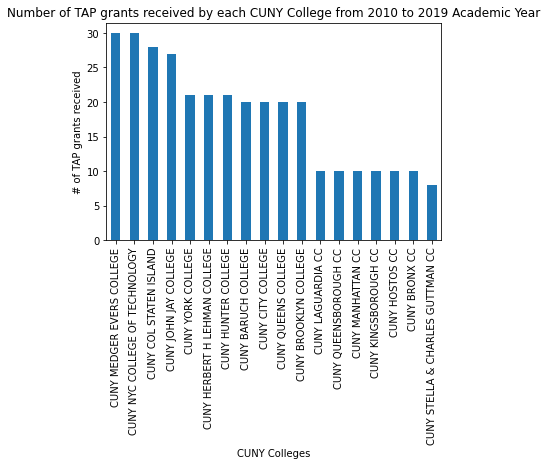

In [200]:
cuny_tap_data["TAP College Name"].value_counts().plot.bar()
plt.title("Number of TAP grants received by each CUNY College from 2010 to 2019 Academic Year")
plt.xlabel("CUNY Colleges")
plt.ylabel("# of TAP grants received")

Text(0, 0.5, '# of TAP grants received')

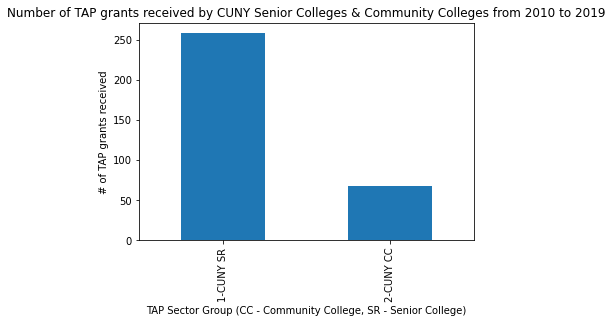

In [183]:
cuny_tap_data["TAP Sector Group"].value_counts().plot.bar()
plt.title("Number of TAP grants received by CUNY Senior Colleges & Community Colleges from 2010 to 2019")
plt.xlabel("TAP Sector Group (CC - Community College, SR - Senior College)")
plt.ylabel("# of TAP grants received")

Text(0, 0.5, 'Frequency')

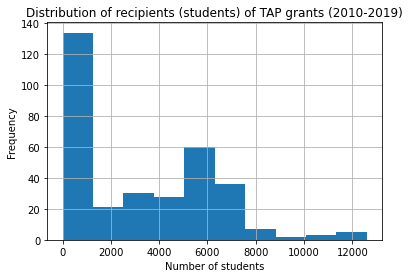

In [184]:
cuny_tap_data["TAP Recipient Headcount"].hist()
plt.title("Distribution of recipients (students) of TAP grants (2010-2019)")
plt.xlabel("Number of students")
plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

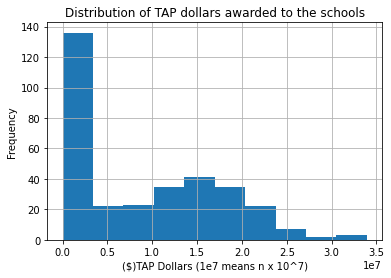

In [230]:
cuny_tap_data["TAP Recipient Dollars"].hist()
plt.title("Distribution of TAP dollars awarded to the schools")
plt.xlabel("($)TAP Dollars (1e7 means n x 10^7)")
plt.ylabel("Frequency")

### 3. Multiple Variable Distribution Plots

Text(0.5, 6.79999999999999, 'Academic Year (2010-2019)')

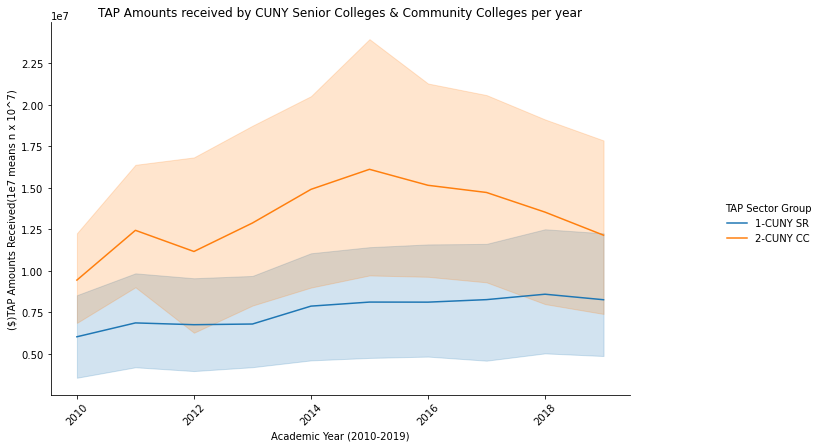

In [233]:
# Plot the graph
g=sns.relplot(x ="Academic Year", y ="TAP Recipient Dollars", kind ="line", hue ="TAP Sector Group", data=cuny_tap_data)

# Resize the graph
g.fig.set_size_inches(12,6)
plt.xticks(rotation=45)

# Title and axes labels added to the graph
plt.title("TAP Amounts received by CUNY Senior Colleges & Community Colleges per year")
plt.ylabel("($)TAP Amounts Received(1e7 means n x 10^7)")
plt.xlabel("Academic Year (2010-2019)")

Text(0.5, 6.79999999999999, 'CUNY College')

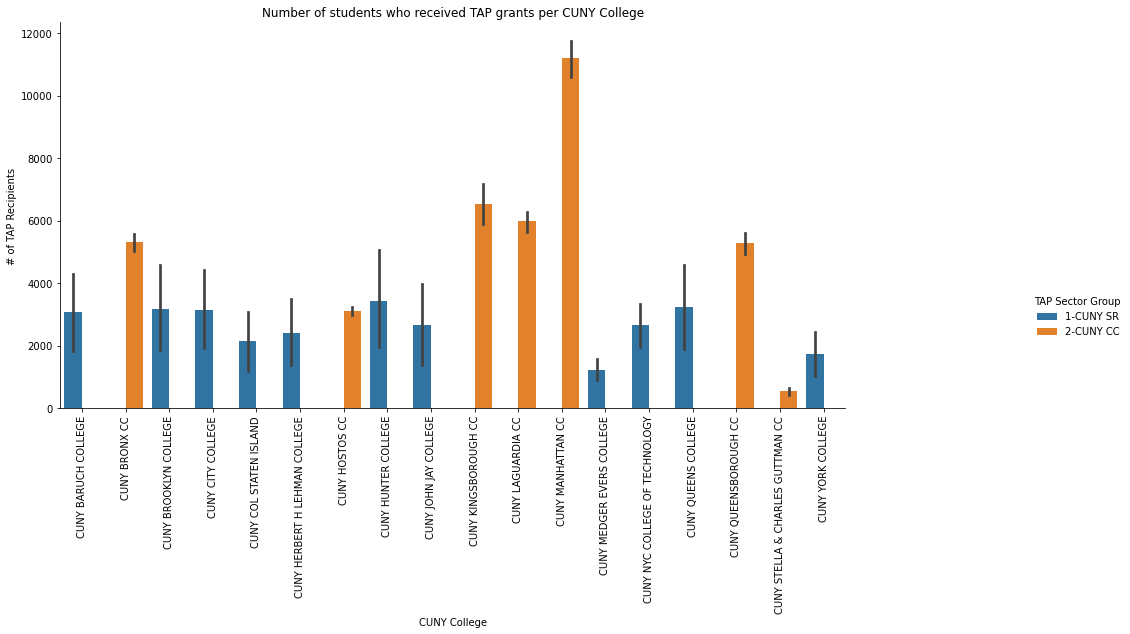

In [226]:
g=sns.catplot(x="TAP College Name", y ="TAP Recipient Headcount", hue ="TAP Sector Group", kind ="bar", data=cuny_tap_data)

# Resize the graph
g.fig.set_size_inches(18,6)
plt.xticks(rotation=90)

# Title and axes labels added to the graph
plt.title("Number of students who received TAP grants per CUNY College")
plt.ylabel("# of TAP Recipients")
plt.xlabel("CUNY College")